In [1]:
import geopandas as gpd
import pandas as pd

<Axes: >

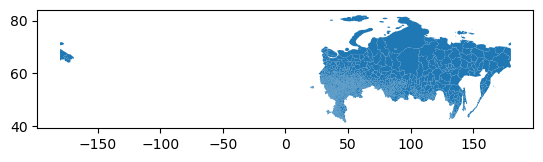

In [2]:
gdf_t_dict_municipal_districts_poly = gpd.read_file("../data/sberindex/6_t_dict_municipal/t_dict_municipal_districts_poly.gpkg")
gdf_t_dict_municipal_districts_poly["territory_id"] = gdf_t_dict_municipal_districts_poly["territory_id"].astype(int)
gdf_t_dict_municipal_districts_poly = gdf_t_dict_municipal_districts_poly[gdf_t_dict_municipal_districts_poly["year_to"] == 9999]

df_t_dict_municipal_districts = pd.read_excel("../data/sberindex/6_t_dict_municipal/t_dict_municipal_districts.xlsx")
df_t_dict_municipal_districts = df_t_dict_municipal_districts[df_t_dict_municipal_districts["year_to"] == 9999]
df_t_dict_municipal_districts = df_t_dict_municipal_districts[
    ["territory_id", "municipal_district_name_short", "municipal_district_name", "region_name"]
]

gdf_t_dict_municipal_districts_poly = gdf_t_dict_municipal_districts_poly.merge(
    df_t_dict_municipal_districts, on="territory_id", how="left"
)
gdf_t_dict_municipal_districts_poly.plot()

In [3]:
df_1_market_access = pd.read_parquet("../data/sberindex/1_market_access.parquet")
df_1_market_access

,territory_id,market_access
0,1,309.6
1,2,322.8
2,3,315.2
3,4,315.5
4,5,320.2
...,...,...
2566,3011,307.9
2567,3012,307.7
2568,3013,465.6
2569,3014,473.7


In [4]:
df_2_bdmo_population = pd.read_parquet("../data/sberindex/2_bdmo_population.parquet")
for col in ["year", "period", "age", "gender"]:
    print(f"Уникальные {col}: {df_2_bdmo_population[col].unique()}")
df_2_bdmo_population

Уникальные year: [2023 2024]
Уникальные period: ['год']
Уникальные age: ['0' '1' '10' '11' '12' '13' '14' '15' '16' '17' '18' '19' '2' '20' '21'
 '22' '23' '24' '25' '26' '27' '28' '29' '3' '30' '31' '32' '33' '34' '35'
 '36' '37' '38' '39' '4' '40' '41' '42' '43' '44' '45' '46' '47' '48' '49'
 '5' '50' '51' '52' '53' '54' '55' '56' '57' '58' '59' '6' '60' '61' '62'
 '63' '64' '65' '65+' '66' '67' '68' '69' '7' '70+' '8' '9' 'Всего' '70'
 '71' '72' '73' '74' '75' '76' '77' '78' '79' '80+']
Уникальные gender: ['Женщины' 'Мужчины']


,territory_id,year,period,age,gender,value
0,1402,2023,год,0,Женщины,288.0
1,1402,2023,год,0,Мужчины,301.0
2,1402,2023,год,1,Женщины,277.0
3,1402,2023,год,1,Мужчины,316.0
4,1402,2023,год,10,Женщины,414.0
...,...,...,...,...,...,...
700210,1401,2024,год,8,Мужчины,155.0
700211,1401,2024,год,9,Женщины,132.0
700212,1401,2024,год,9,Мужчины,134.0
700213,1401,2024,год,Всего,Женщины,14527.0


In [5]:
df_3_bdmo_migration = pd.read_parquet("../data/sberindex/3_bdmo_migration.parquet")
for col in ["year", "period", "age", "gender"]:
    print(f"Уникальные {col}: {df_3_bdmo_migration[col].unique()}")
df_3_bdmo_migration

Уникальные year: [2023]
Уникальные period: ['год']
Уникальные age: ['75-79' '55-59' '15-19' '90-94' '50-54' '35-39' '95-99' '40-44' '0-4'
 '5-9' '65-69' '80-84' '30-34' '25-29' '3-5' '20-24' 'Всего' '10-14'
 '60-64' '70-74' '45-49' '85-89' '100']
Уникальные gender: ['Женщины' 'Мужчины']


,territory_id,year,period,age,gender,value
0,2335,2023,год,75-79,Женщины,5.0
1,2335,2023,год,75-79,Мужчины,NaN
2,2335,2023,год,55-59,Женщины,-4.0
3,2335,2023,год,55-59,Мужчины,-4.0
4,2335,2023,год,15-19,Женщины,-11.0
...,...,...,...,...,...,...
106219,2334,2023,год,70-74,Мужчины,-3.0
106220,2334,2023,год,45-49,Женщины,3.0
106221,2334,2023,год,45-49,Мужчины,3.0
106222,2334,2023,год,85-89,Женщины,-1.0


In [6]:
df_4_bdmo_salary = pd.read_parquet("../data/sberindex/4_bdmo_salary.parquet")
for col in ["year", "period", "okved_name", "okved_letter"]:
    print(f"Уникальные {col}: {df_4_bdmo_salary[col].unique()}")
df_4_bdmo_salary

Уникальные year: [2023 2024]
Уникальные period: ['январь-декабрь' 'январь-июнь' 'январь-март' 'январь-сентябрь']
Уникальные okved_name: ['Все отрасли' 'Обрабатывающие производства' 'Услуги ЖКХ' 'Строительство'
 'Торговля' 'ИТ и связь' 'Финансы и страхование'
 'Операции с недвижимостью' 'Научная и проф. деятельность'
 'Административная деятельность' 'Гос. управление и военн. безопасность'
 'Образование' 'Здравоохранение' 'Спорт и досуг' 'Прочие услуги'
 'Сельское хозяйство' 'Водоснабжение' 'Транспортировка и хранение'
 'Добыча полезных ископаемых' 'Гостиницы и общепит'
 'Деятельность экстер. организаций']
Уникальные okved_letter: ['0' 'C' 'D' 'F' 'G' 'J' 'K' 'L' 'M' 'N' 'O' 'P' 'Q' 'R' 'S' 'A' 'E' 'H'
 'B' 'I' 'U']


,territory_id,year,period,okved_name,okved_letter,value
0,3,2023,январь-декабрь,Все отрасли,0,46265.2
1,3,2023,январь-декабрь,Обрабатывающие производства,C,50330.1
2,3,2023,январь-декабрь,Услуги ЖКХ,D,43988.1
3,3,2023,январь-декабрь,Строительство,F,78478.4
4,3,2023,январь-декабрь,Торговля,G,39262.9
...,...,...,...,...,...,...
369807,2617,2024,январь-сентябрь,Гостиницы и общепит,I,NaN
369808,2617,2024,январь-сентябрь,Гос. управление и военн. безопасность,O,NaN
369809,2617,2024,январь-сентябрь,Образование,P,44966.9
369810,2617,2024,январь-сентябрь,Спорт и досуг,R,45781.5


In [7]:
df_5_connection = pd.read_parquet("../data/sberindex/5_connection.parquet")
df_5_connection

,territory_id_x,territory_id_y,distance
0,2,1,100.9
1,3,1,36.1
2,3,2,85.0
3,4,3,44.4
4,4,1,59.9
...,...,...,...
3303731,2313,2286,0.0
3303732,2316,2288,0.0
3303733,2337,2318,0.0
3303734,2334,2320,0.0


In [8]:
df_4_bdmo_salary = pd.read_parquet("../data/sberindex/4_bdmo_salary.parquet")
for col in ["year", "period", "okved_name", "okved_letter"]:
    print(f"Уникальные {col}: {df_4_bdmo_salary[col].unique()}")
df_4_bdmo_salary

Уникальные year: [2023 2024]
Уникальные period: ['январь-декабрь' 'январь-июнь' 'январь-март' 'январь-сентябрь']
Уникальные okved_name: ['Все отрасли' 'Обрабатывающие производства' 'Услуги ЖКХ' 'Строительство'
 'Торговля' 'ИТ и связь' 'Финансы и страхование'
 'Операции с недвижимостью' 'Научная и проф. деятельность'
 'Административная деятельность' 'Гос. управление и военн. безопасность'
 'Образование' 'Здравоохранение' 'Спорт и досуг' 'Прочие услуги'
 'Сельское хозяйство' 'Водоснабжение' 'Транспортировка и хранение'
 'Добыча полезных ископаемых' 'Гостиницы и общепит'
 'Деятельность экстер. организаций']
Уникальные okved_letter: ['0' 'C' 'D' 'F' 'G' 'J' 'K' 'L' 'M' 'N' 'O' 'P' 'Q' 'R' 'S' 'A' 'E' 'H'
 'B' 'I' 'U']


,territory_id,year,period,okved_name,okved_letter,value
0,3,2023,январь-декабрь,Все отрасли,0,46265.2
1,3,2023,январь-декабрь,Обрабатывающие производства,C,50330.1
2,3,2023,январь-декабрь,Услуги ЖКХ,D,43988.1
3,3,2023,январь-декабрь,Строительство,F,78478.4
4,3,2023,январь-декабрь,Торговля,G,39262.9
...,...,...,...,...,...,...
369807,2617,2024,январь-сентябрь,Гостиницы и общепит,I,NaN
369808,2617,2024,январь-сентябрь,Гос. управление и военн. безопасность,O,NaN
369809,2617,2024,январь-сентябрь,Образование,P,44966.9
369810,2617,2024,январь-сентябрь,Спорт и досуг,R,45781.5


In [9]:
df_salary_for_all_2024 = df_4_bdmo_salary[(df_4_bdmo_salary["okved_name"] == "Все отрасли") & (df_4_bdmo_salary["year"] == 2024)]
df_salary_for_all_2024 = df_salary_for_all_2024.groupby("territory_id").agg({"value": "mean"}).reset_index()
df_salary_for_all_2024.rename(columns={"value": "salary_all_2024"}, inplace=True)
df_salary_for_all_2024

,territory_id,salary_all_2024
0,1,54261.650
1,2,44597.300
2,3,52308.000
3,4,49607.550
4,5,46531.950
...,...,...
2583,3011,62757.925
2584,3012,55416.075
2585,3013,44908.525
2586,3014,97037.700


In [10]:
gdf_md_with_salary_all_2024 = gdf_t_dict_municipal_districts_poly.merge(df_salary_for_all_2024, on="territory_id", how="left")
gdf_md_without_salary_all_2024 = gdf_md_with_salary_all_2024[gdf_md_with_salary_all_2024["salary_all_2024"].isna()]

# Отсеем Москву, так как она сильно отрывается от остальных
print("В какие субъекты входят топ-50 МО с наивысшей зарплатой:")
print(gdf_md_with_salary_all_2024.sort_values("salary_all_2024", ascending=False).iloc[0:50]["region_name"].value_counts())
gdf_md_without_salary_all_2024_without_msk_and_spb = gdf_md_with_salary_all_2024[
    ~gdf_md_with_salary_all_2024["region_name"].isin(["Москва"])
]

В какие субъекты входят топ-50 МО с наивысшей зарплатой:
region_name
Москва                             32
Санкт-Петербург                     4
Чукотский автономный округ          3
Камчатский край                     2
Магаданская область                 2
Ямало-Ненецкий автономный округ     2
Сахалинская область                 2
Амурская область                    1
Красноярский край                   1
Забайкальский край                  1
Name: count, dtype: int64


In [11]:
# m = gdf_md_without_salary_all_2024_without_msk_and_spb.explore(column="salary_all_2024", cmap="Spectral")
# m = gdf_md_without_salary_all_2024.explore(m=m, color="grey")
# m

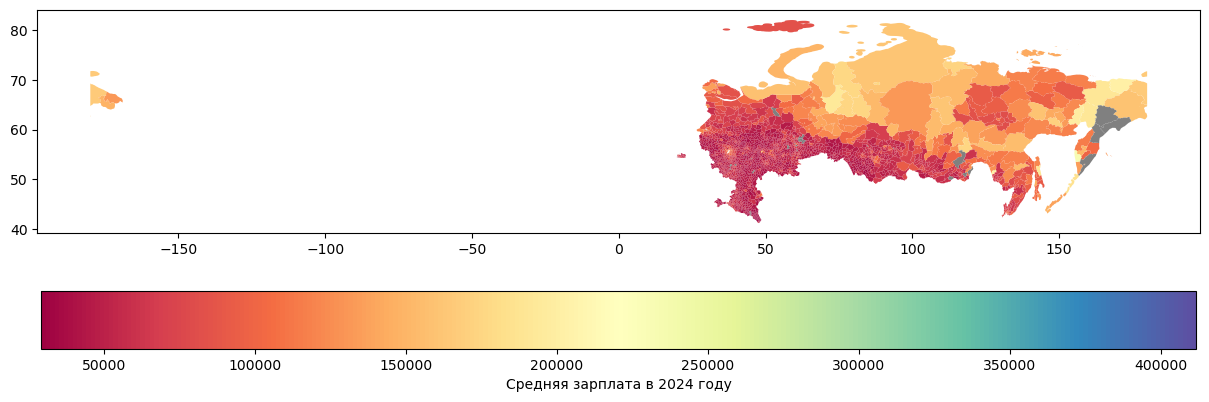

In [12]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1, figsize=(15, 5))
plot = gdf_md_without_salary_all_2024_without_msk_and_spb.plot(
    column='salary_all_2024', 
    cmap='Spectral', 
    ax=ax,
    legend=True,
    legend_kwds={
        'label': 'Средняя зарплата в 2024 году',
        'orientation': 'horizontal'
    }
)
gdf_md_without_salary_all_2024.plot(color='grey', ax=ax)
plt.show()

In [13]:
# Далее можно найти соседей с наибольшими разрывами в зарплатах